In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
res = pd.read_pickle('data/restaurants.pkl')
res = res.set_index('business_id')
rev = pd.read_pickle('data/restaurants_review.pkl')
cl_1 = pd.read_pickle('2018Q1.pkl')
cl_2 = pd.read_pickle('2018Q2.pkl')
cl_3 = pd.read_pickle('2018Q3.pkl')
cl_4 = pd.read_pickle('2018Q4.pkl')

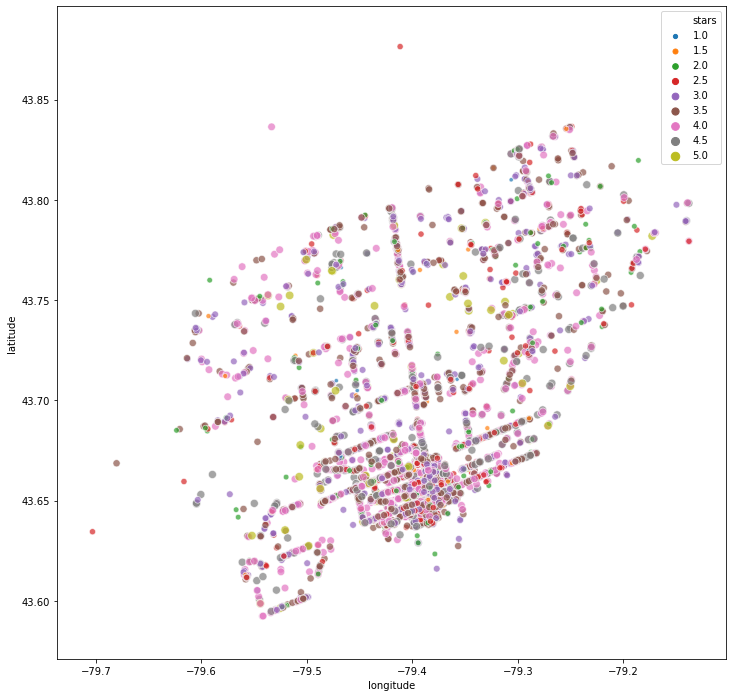

In [55]:
fig = plt.figure(figsize=[12, 12])
sns.scatterplot(data=res, x='longitude', y='latitude', size='stars', alpha=0.7,
                hue='stars', legend='full', palette=sns.color_palette(n_colors=9))

In [56]:
cl_1[0].value_counts()
cl_2[0].value_counts()
cl_3[0].value_counts()
cl_4[0].value_counts()

0    9100
4    4875
2    1582
3      85
1      40
Name: 0, dtype: int64

0    9940
3    5408
2     998
4      54
1      42
Name: 0, dtype: int64

1    10507
0     5634
3      607
4       30
2       14
Name: 0, dtype: int64

4    4159
0    2222
3     123
2       4
1       1
Name: 0, dtype: int64

In [58]:
for i, g in cl_1.groupby(0):
    c = 0
    print ('========================', i)
    for j in g.index:
        b_id = rev.loc[j, 'business_id']
        print (rev.loc[j, 'text'])
        c += 1
        if c == 20:
            break

======================== 0
Came to this place based on yelp reviews and it did not disappoint. Got the chicken wings to start, kao soi with chicken and an dish from the chefs special - Steamed fish coconut curry. Chicken wings were good, especially when hot, the sauce gelatinized as it cooled. Kao soi was the best I've ever had, an excellent portion ans the chicken was very tender. The the fish coconut curry was good too, wasn't much of a curry but was still very flavourful. Service was fast and people were so friendly and kind. Will definitely go back to try other menu items.
My review is very similar to that of Casey Lyn B: I am American, have rarely had poutine, and this is the only poutine place I've ever been to in Canada. It is, in fact, the only restaurant I have ever been to in Canada (went during a 6-hr Toronto layover), but the bacon+chive poutine was just perfect and everything I wanted. I liked all the components: the fries themselves, the gravy, the cheese curds, and the b

In [69]:
for i, r in rev.iterrows():
    a = rev.loc[i, 'concept1':'concept5'].apply(lambda x: abs(x))
    rev.loc[i, 'concept'] = a.idxmax()

In [79]:
for i, g in rev.groupby(rev.date.dt.to_period('Q')):
    print (i)
    for j, r in g.groupby('concept'):
        print (r.concept.value_counts())

2018Q1
concept1    2134
Name: concept, dtype: int64
concept2    2705
Name: concept, dtype: int64
concept3    4299
Name: concept, dtype: int64
concept4    3573
Name: concept, dtype: int64
concept5    2971
Name: concept, dtype: int64
2018Q2
concept1    2190
Name: concept, dtype: int64
concept2    2982
Name: concept, dtype: int64
concept3    4409
Name: concept, dtype: int64
concept4    3905
Name: concept, dtype: int64
concept5    2956
Name: concept, dtype: int64
2018Q3
concept1    2156
Name: concept, dtype: int64
concept2    3075
Name: concept, dtype: int64
concept3    4607
Name: concept, dtype: int64
concept4    3851
Name: concept, dtype: int64
concept5    3103
Name: concept, dtype: int64
2018Q4
concept1    838
Name: concept, dtype: int64
concept2    1162
Name: concept, dtype: int64
concept3    1808
Name: concept, dtype: int64
concept4    1474
Name: concept, dtype: int64
concept5    1227
Name: concept, dtype: int64


In [84]:
for i, g in rev.groupby('business_id'):
    res.loc[i, 'concept'] = g.concept.value_counts().idxmax()

In [87]:
res.dropna()

,name,city,state,latitude,longitude,stars,review_count,is_open,attributes,categories,concept
business_id,,,,,,,,,,,
NDuUMJfrWk52RA-H-OtrpA,Bolt Fresh Bar,Toronto,ON,43.642889,-79.425429,3.0,57,1,"{'WiFi': 'u'no'', 'BikeParking': 'True', 'Rest...","Juice Bars & Smoothies, Food, Restaurants, Fas...",concept4
mlHC2XcU9Bows6cnYEmRgg,Mad Crush Wine Bar,Toronto,ON,43.655420,-79.413352,4.0,9,0,"{'Alcohol': 'u'full_bar'', 'Caters': 'False', ...","Restaurants, Breakfast & Brunch, Bars, Modern ...",concept4
RFbMVekR8lU9tPJ8sWrwHg,Tavolino,Toronto,ON,43.704229,-79.388230,4.0,18,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Italian, Restaurants",concept3
NPHZkn1e-tSJAbo8Zm9rYw,Burrito Bandidos,Toronto,ON,43.666181,-79.316468,3.5,43,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Tex-Mex, Mexican, Restaurants",concept2
gyFYZV4b_9TxG1ulQNi0Ig,Paramount Fine Foods,Toronto,ON,43.638442,-79.417237,2.0,40,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsTab...","Middle Eastern, Restaurants, Salad, Breakfast ...",concept3
...,...,...,...,...,...,...,...,...,...,...,...
DBmpoOJubrYfyIpswyql7w,Kobi Korean Restaurant,Toronto,ON,43.668188,-79.386203,3.0,15,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, Korean",concept3
qDv5GyT2tzlJrbtxqzasQA,Roti Palace of India,Toronto,ON,43.645064,-79.520538,4.0,12,1,"{'Caters': 'True', 'GoodForKids': 'True', 'Res...","Restaurants, Indian",concept4
HSFUD5xNd5HKsXNt2uNy0Q,Brick Farm Breakfast,Toronto,ON,43.686047,-79.311792,3.5,10,1,"{'RestaurantsPriceRange2': '2', 'NoiseLevel': ...","Breakfast & Brunch, Restaurants",concept4


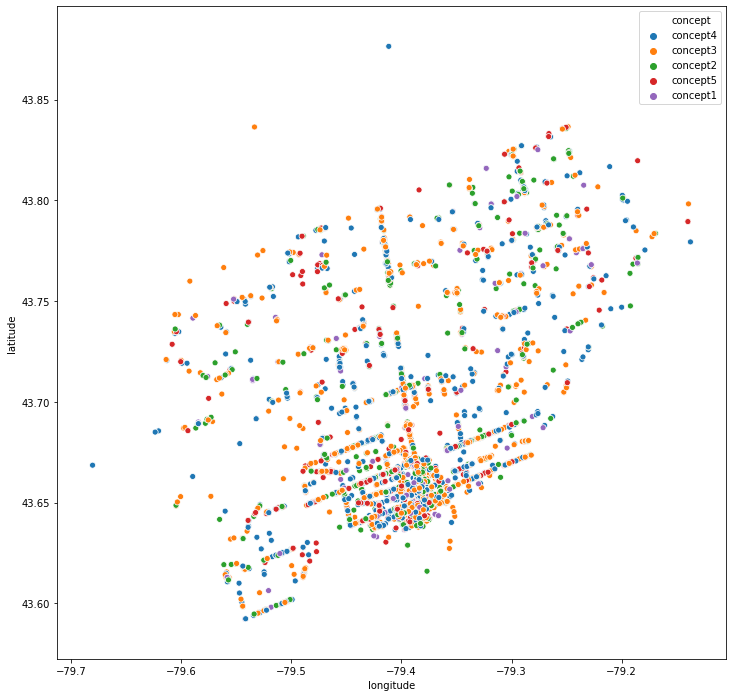

In [92]:
fig = plt.figure(figsize=[12, 12])
sns.scatterplot(data=res,
                x='longitude',
                y='latitude', hue='concept')

In [97]:
rev.text.values

array(["Came to this place based on yelp reviews and it did not disappoint. Got the chicken wings to start, kao soi with chicken and an dish from the chefs special - Steamed fish coconut curry. Chicken wings were good, especially when hot, the sauce gelatinized as it cooled. Kao soi was the best I've ever had, an excellent portion ans the chicken was very tender. The the fish coconut curry was good too, wasn't much of a curry but was still very flavourful. Service was fast and people were so friendly and kind. Will definitely go back to try other menu items.",
       "Very disappointing, the price is too expensive for the food quality.   First of all, there is no green tea or red bean  ice cream on the menu.   They only have ice cream bar, and it is only one per person, on the menu, they didn't say that is limited. Secondly, way too much rice on the sushi. I guess thats how they make the money. Lastly, the ipad service is stupid. you have to wait for someone to confirm it. Overall, not